# Assignment 6: Implement SGD for linear regression

### Tasks to be done:

1. Please check the problem statement at https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/3044/assignment-6-implement-sgd-for-linear-regression/3/module-3-foundations-of-natural-language-processing-and-machine-learning
2. Implement your own version of sklearn SGDRegresser (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)
3. Plot a chart of predicted values Vs actual values of your own SGD Implementation
4. Now try out the SGDRegresser of sklearn and plot the chart of predicted values Vs actual values
5. In a tabular format, compare the weights obtained from your own implementation with the weights obtained after applying sklearn's SGDRegresser.
6. Also compare the MSE obtained from your custom implementation of SGDRegressor and that of sklearns implementation.
7. Try to get the weights & MSE of your custom implementation, similar to the weights and MSE of sklearns implementation.

In [37]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

## 1. SGDRegresser of sklearn

### (a) Loading data

In [38]:
# Describing the Boston data
boston = load_boston()
print(boston.DESCR)
features = list(boston.feature_names)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [39]:
X = pd.DataFrame(boston.data)
Y = pd.Series(boston.target)

In [40]:
X.columns = features
Y = np.array(Y).reshape(-1,1)
print(type(Y))
print(type(X))
print("Shape of X",X.shape)
print("Shape of Y",Y.shape)


<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
Shape of X (506, 13)
Shape of Y (506, 1)


### (b) Standardasing the data 

In [41]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaler = scaler.transform(X)
print(type(X_scaler))
print("Shape of X:",X_scaler.shape)

<class 'numpy.ndarray'>
Shape of X: (506, 13)


In [42]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaler, Y, test_size=0.33)

### (c) Regression using SGDRegressor from SCIKITLearn

In [43]:
clf = SGDRegressor()
clf.fit(X_train, Y_train)

Y_train_pred = clf.predict(X_train)
Y_test_pred = clf.predict(X_test)
mse_train_sgd = mean_squared_error(Y_train, Y_train_pred)
print("Mean Squared error on train data:",mse_train_sgd)
mse_test_sgd = mean_squared_error(Y_test, Y_test_pred)
print("Mean Squared error on test data:",mse_test_sgd)



Mean Squared error on train data: 23.026617738952194
Mean Squared error on test data: 23.87498248372573


#### Coefficients and intercept : 

In [44]:
print("Co-efficients or weights on train data: ",clf.coef_)
print("Intercept : ",clf.intercept_ )

Co-efficients or weights on train data:  [-0.75289845  0.56695226 -0.97186168  1.10544631 -0.73486783  3.07931666
 -0.2836728  -2.32430194  1.00356253 -0.48851943 -1.45082856  1.03426082
 -3.45697279]
Intercept :  [22.0134567]


### (d) Prices vs Predicted prices Plot  on TEST data

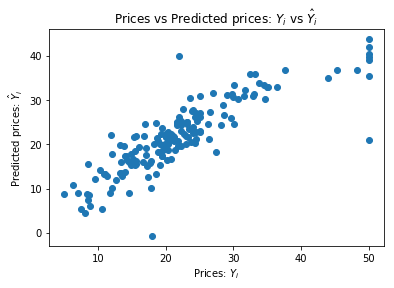

In [45]:
plt.scatter(Y_test , Y_test_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

# 2. Implement Own SGD for linear regression

### (a) Loading data

In [46]:
#adding intercept coefficients to all the points. It is always 1 i.e; W0 = 1
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train] 
X_test_b = np.c_[np.ones((X_test.shape[0],1)),X_test]
print("Shape of train data with intercept coefficient: ",X_train_b.shape)
print("Shape of test data with intercept coefficient: ",X_test_b.shape)

Shape of train data with intercept coefficient:  (339, 14)
Shape of test data with intercept coefficient:  (167, 14)


In [47]:
#Stochastic Gradient Descent
#https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/ch04.html
#Reference book Hands-On Machine Learning with Scikit-Learn and TensorFlow by Aurélien Géron

n_epochs = 50   #Initializing number of times we are looking into the data
t0, t1 = 5, 50  # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)
n = X_train_b.shape[0]
W = np.random.randn(X_train_b.shape[1],1)  # random initialization
mse_list = []
y_ownpred_train = []
for epoch in range(n_epochs):
    for i in range(n):
        random_index = np.random.randint(n)            #picking a random number from X_train_b
        xi = X_train_b[random_index:random_index+1]    #selecting only one datapoint for each iteration randomly (k =1)
        yi = Y_train[random_index:random_index+1]  
        #calculating partial derivative where matrix shapes xi(1x14),yi(1x1),W(14x1) in each iteration
        gradients = 2 * xi.T.dot(xi.dot(W) - yi)
        # choosing different learning rates in each iteration to overcome oscillations around minima
        lr = learning_schedule(epoch * n + i)    
        W = W - lr * gradients
    Y_pred = X_train_b.dot(W)
    mse_train_own = mean_squared_error(Y_train, Y_pred)
    mse_list.append(mse_train_own)
print("Mean Squared errors on train data :",mse_train_own)


        

Mean Squared errors on train data : 22.63488997174899


In [48]:
print(mse_list)

[382.00276641220023, 101.78628284914764, 59.75977123152382, 48.035501734578965, 39.044782055952886, 34.80573822903285, 32.39139187772214, 30.230242748267536, 29.08605174790497, 28.354870554270242, 27.1464421243319, 27.529562663198963, 26.571021135688046, 25.56735899643081, 25.3197715036439, 25.055468747921033, 25.672059041353116, 24.651258168885036, 24.301281491558342, 24.428304900908987, 24.123588904823027, 23.962526332515818, 23.78287213495516, 23.72776249179641, 23.7331026286678, 23.804429871034706, 23.494395854100198, 23.375626074811567, 23.265062773023356, 23.208409685214335, 23.32217414080563, 23.181146842461974, 23.241110140179348, 23.322096693305824, 23.066422699173025, 22.94275460485332, 22.984659067727485, 22.924527198424943, 22.934567285638533, 23.091884815128502, 22.803687678969595, 22.868982821930995, 22.859054914841696, 22.88958202864231, 22.781288769438177, 22.647750989146424, 22.625609650752203, 22.614786404534794, 22.654622601528114, 22.63488997174899]


### OWN coefficients : 

In [49]:
print(W)
print("*"*75)
print("The intercept : ", W[0]) 
print("The coefficients : ", W[1:]) 


[[22.75200375]
 [-0.95448147]
 [ 0.84984325]
 [-0.9611782 ]
 [ 1.35643124]
 [-1.54757795]
 [ 3.04973644]
 [-0.36522738]
 [-3.39645227]
 [ 0.32260407]
 [ 0.82724749]
 [-1.8828572 ]
 [ 0.89041569]
 [-3.78420379]]
***************************************************************************
The intercept :  [22.75200375]
The coefficients :  [[-0.95448147]
 [ 0.84984325]
 [-0.9611782 ]
 [ 1.35643124]
 [-1.54757795]
 [ 3.04973644]
 [-0.36522738]
 [-3.39645227]
 [ 0.32260407]
 [ 0.82724749]
 [-1.8828572 ]
 [ 0.89041569]
 [-3.78420379]]


### SKlearn Coefficients:

In [50]:
coef_sgd = clf.coef_
print("The coefficeints using SKlearn :",coef_sgd)
intercept_sgd = clf.intercept_
print("The intercept usong SKlearn",intercept_sgd)

The coefficeints using SKlearn : [-0.75289845  0.56695226 -0.97186168  1.10544631 -0.73486783  3.07931666
 -0.2836728  -2.32430194  1.00356253 -0.48851943 -1.45082856  1.03426082
 -3.45697279]
The intercept usong SKlearn [22.0134567]


### Predicting output variables using OWN Coefficients:

In [51]:
Y_own_testpred = X_test_b.dot(W)
mse_test_own = mean_squared_error(Y_test, Y_own_testpred)

### Prices vs Predicted prices Plot 

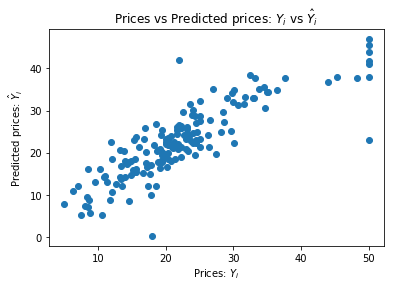

In [52]:
plt.scatter(Y_test, Y_own_testpred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [53]:
print("Mean Squared error on Train data with SGD SKLearn:",mse_train_sgd)
print("Mean Squared error on Test data on custom implementation:",mse_test_sgd)
print("Mean Squared errors on train data on own implementation:",mse_train_own)
print("Mean Squared errors on test data on own implementation:",mse_test_own)

Mean Squared error on Train data with SGD SKLearn: 23.026617738952194
Mean Squared error on Test data on custom implementation: 23.87498248372573
Mean Squared errors on train data on own implementation: 22.63488997174899
Mean Squared errors on test data on own implementation: 25.097869976703205


# Summarising the results

In [54]:
#https://stackoverflow.com/questions/40368908/prettytable-make-use-of-list
from prettytable import PrettyTable
xtable = PrettyTable()
xtable.add_row(["MSE on train data of SKIKIT SGD",mse_train_sgd])
xtable.add_row(["MSE on test data of SKIKIT SGD",mse_test_sgd])
xtable.add_row(["MSE on train data of OWN SGD",mse_train_own])
xtable.add_row(["MSE on test data of OWN SGD",mse_test_own])
print(xtable)



+---------------------------------+--------------------+
|             Field 1             |      Field 2       |
+---------------------------------+--------------------+
| MSE on train data of SKIKIT SGD | 23.026617738952194 |
|  MSE on test data of SKIKIT SGD | 23.87498248372573  |
|   MSE on train data of OWN SGD  | 22.63488997174899  |
|   MSE on test data of OWN SGD   | 25.097869976703205 |
+---------------------------------+--------------------+
